In [1]:
%matplotlib inline

import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

from qiime.parse import parse_mapping_file
from qiime.format import format_mapping_file
from skbio.io.util import open_file
from scipy.stats import pearsonr, spearmanr

from IPython.display import Image

def load_mf(fn):
    with open_file(fn, 'U') as f:
        mapping_data, header, _ = parse_mapping_file(f)
        _mapping_file = pd.DataFrame(mapping_data, columns=header)
        _mapping_file.set_index('SampleID', inplace=True)
    return _mapping_file

def write_mf(f, _df):
    with open_file(f, 'w') as fp:
        lines = format_mapping_file(['SampleID'] + _df.columns.tolist(),
                                    list(_df.itertuples()))
        fp.write(lines+'\n')

## Only run the following cell if you don't yet have greengenes, otherwise this will download the full database

In [ ]:
%%bash

curl -O ftp://greengenes.microbio.me/greengenes_release/gg_13_5/gg_13_8_otus.tar.gz
tar -xzf gg_13_8_otus.tar.gz

In [6]:
!beta_diversity_through_plots.py -i otu_table.15000.no-diarrhea.biom \
-m mapping-file-full.alpha.L6index.txt \
-t gg_13_8_otus/trees/97_otus.tree \
-o beta/15000 \
-a -O 7 \
--color_by_all_fields -f

/Users/yoshikivazquezbaeza/.virtualenvs/qiime-191/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:107: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.171642480781 and the largest is 5.79770590495.
  RuntimeWarning


# *Faecalibacterium* is reduced in diseased subjects and increased in healthy subjects

Principal Coordinates Analysis plot of unweighted UniFrac distances of healthy and diseased dogs, colored by the relative abundance of *k\__Bacteria;p\__Firmicutes;c\__Clostridia;o\__Clostridiales;f\__Ruminococcaceae;g\__Faecalibacterium* as described by the genus-level taxonomic summary. The big spheres represent the subjects with IBD and the small spheres the healhty subjects, the color scale goes from white to orange and finally to red, where white is a low value and red is a high value (aproximately 0.5).

This is conflicting with the findings of Suchodolski et al 2012.

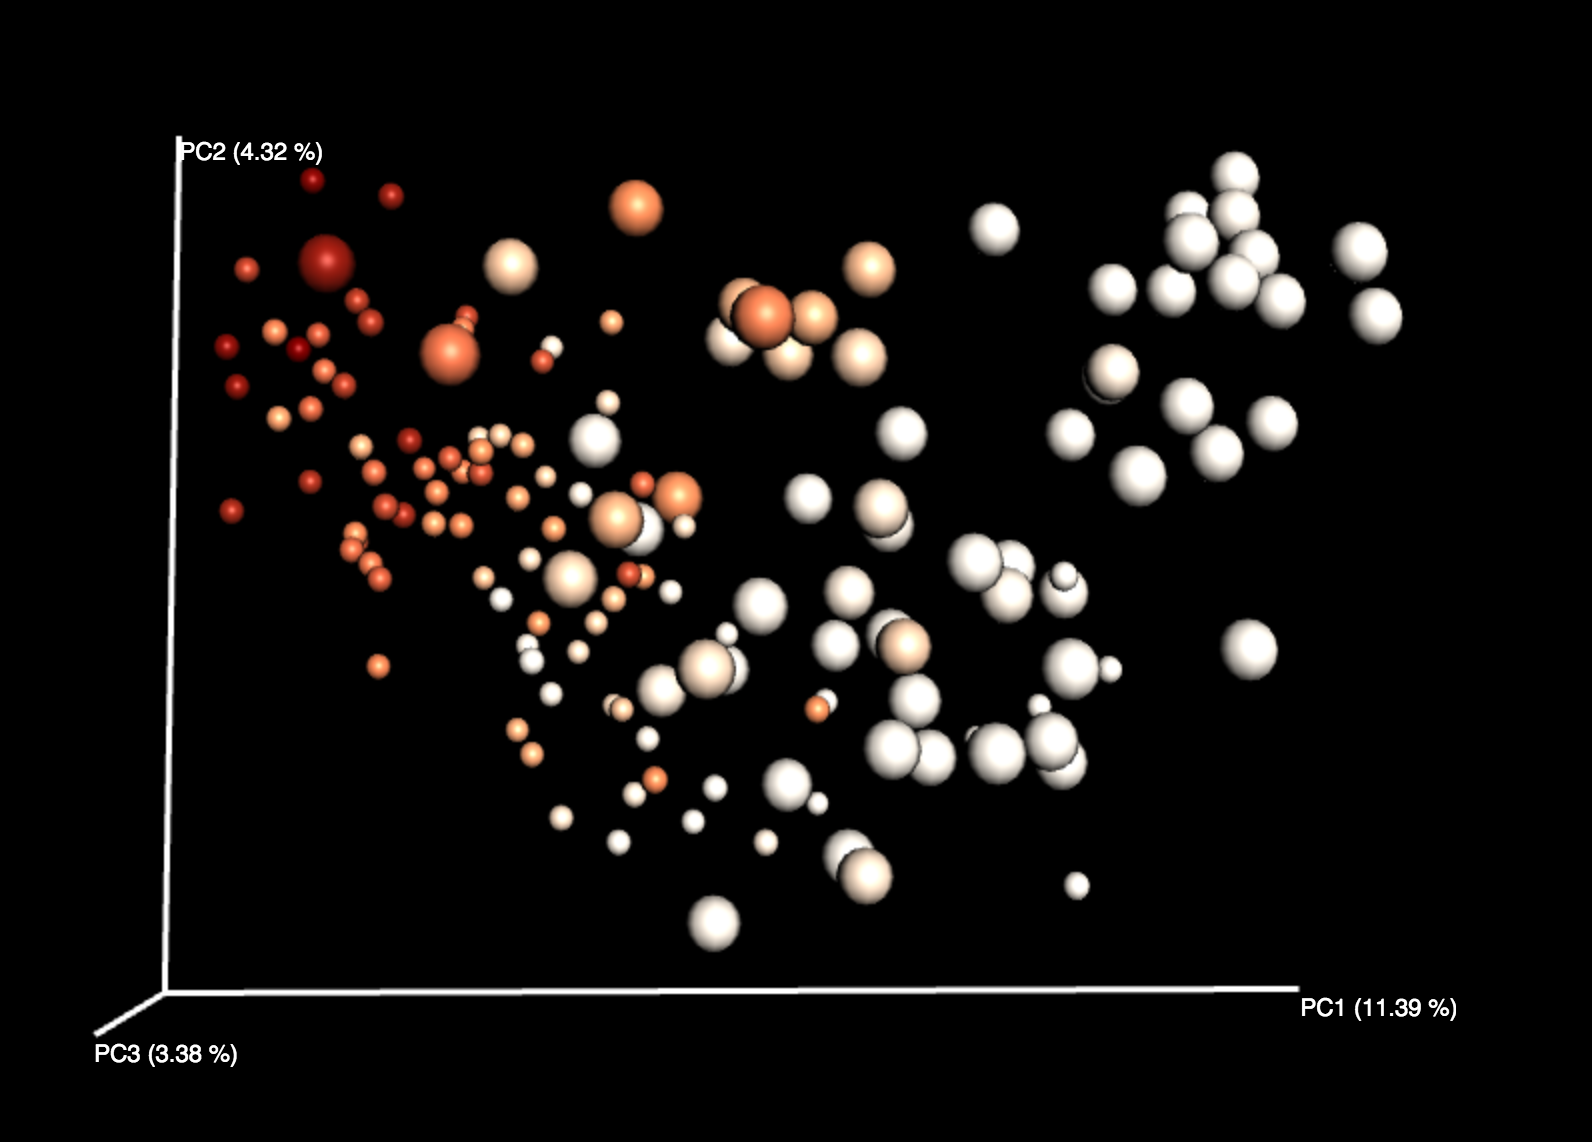

In [25]:
Image('beta/15000/screen-shots/faecalibacterium-unweighted-diseased-are-big-spheres.png')

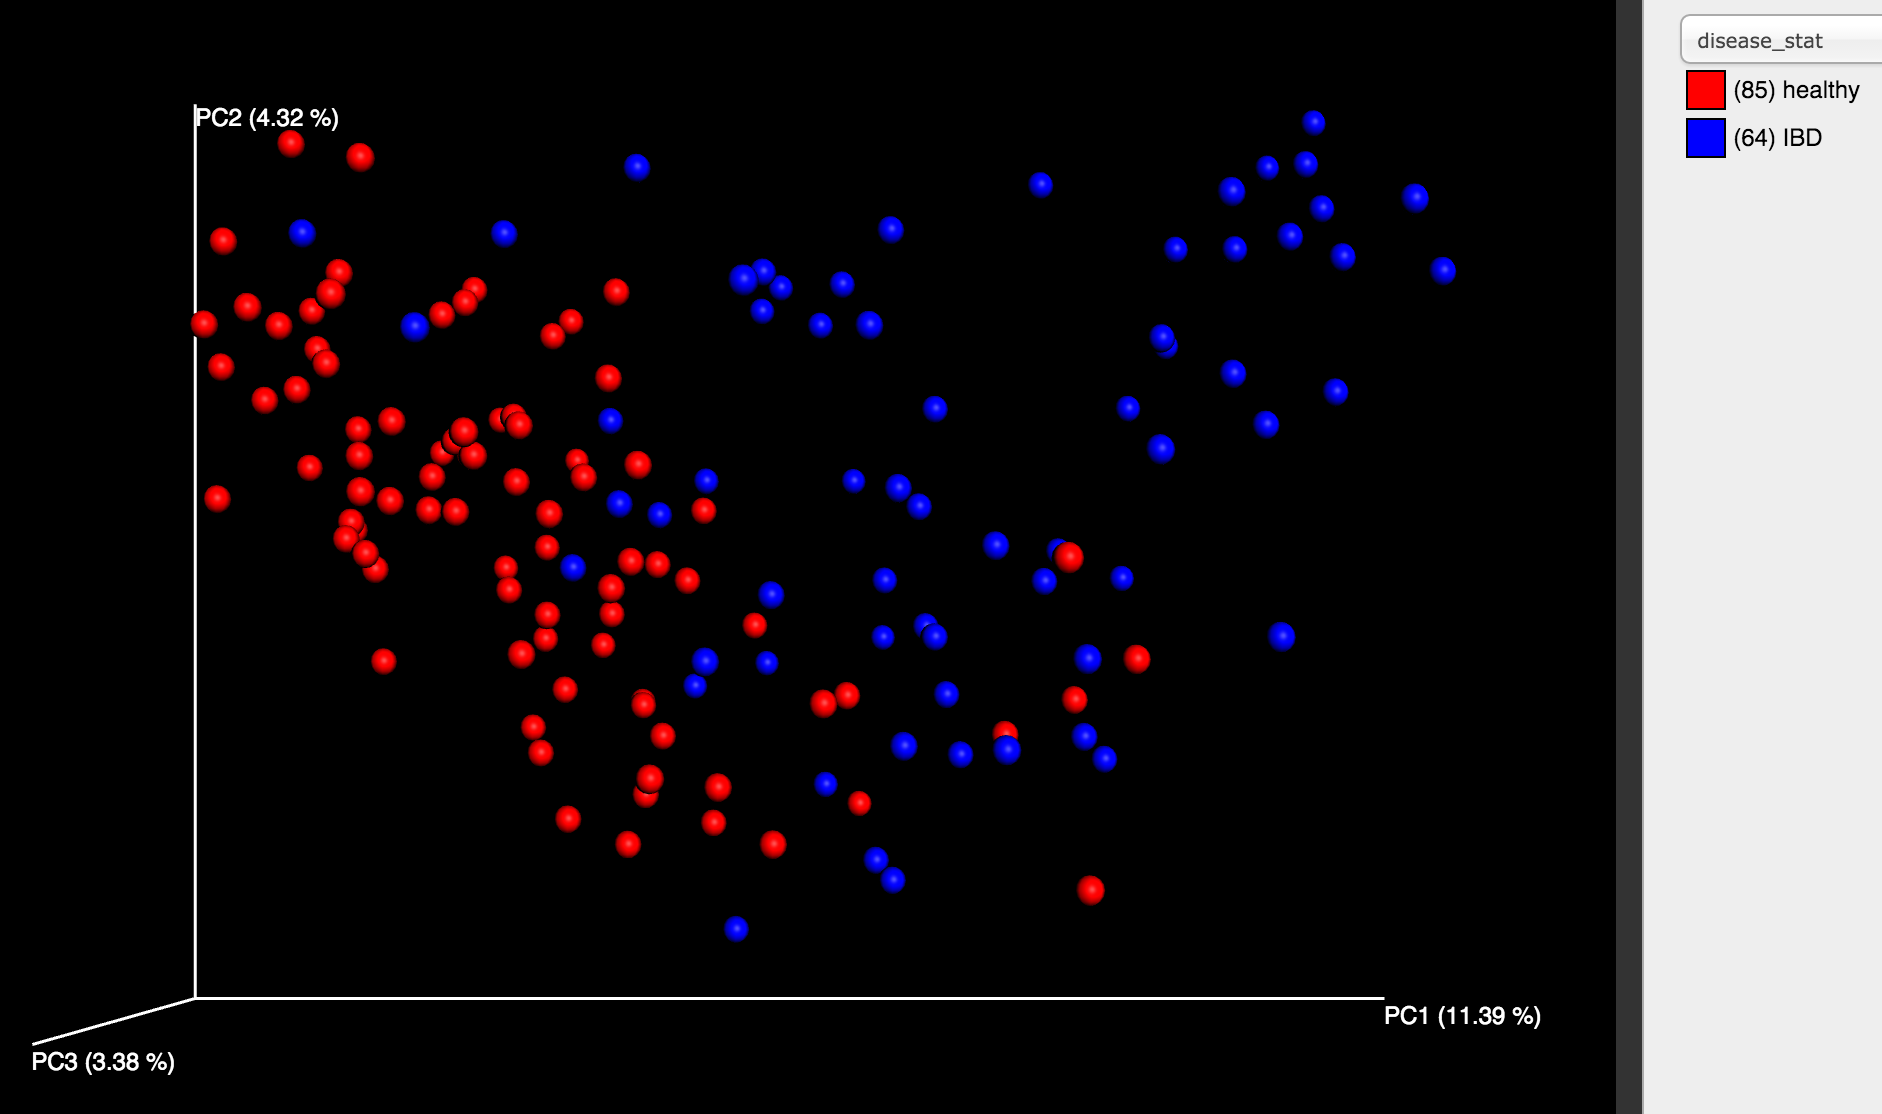

In [26]:
Image('beta/15000/screen-shots/unweighted-disease-status.png')

# $\beta -diversity$ specific by disease state

In [9]:
!split_otu_table.py -i otu_table.15000.no-diarrhea.biom \
-m mapping-file-full.alpha.L6index.txt  -f disease_stat \
-o split-by-disease-state

In [11]:
!beta_diversity_through_plots.py -i split-by-disease-state/otu_table.15000.no-diarrhea__disease_stat_IBD__.biom \
-m mapping-file-full.alpha.L6index.txt \
-t gg_13_8_otus/trees/97_otus.tree \
-o split-by-disease-state/beta/15000/ibd \
--color_by_all_fields -f

!beta_diversity_through_plots.py -i split-by-disease-state/otu_table.15000.no-diarrhea__disease_stat_healthy__.biom \
-m mapping-file-full.alpha.L6index.txt \
-t gg_13_8_otus/trees/97_otus.tree \
-o split-by-disease-state/beta/15000/healthy \
--color_by_all_fields -f

/Users/yoshikivazquezbaeza/.virtualenvs/qiime-191/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:107: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0961613249227 and the largest is 2.39715584052.
  RuntimeWarning
/Users/yoshikivazquezbaeza/.virtualenvs/qiime-191/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:107: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Not

We couldn't quite find anything too interesting in these plots, except for the fact that there doesn't seem to be any grouping withing the disease states i.e. dogs of the same country, weight or age do not seem to cluster together.

# Biplots of the $\beta$-diversity plots

In [5]:
!summarize_taxa.py -i otu_table.15000.no-diarrhea.biom -o taxonomic_summaries/no-diarrhea/summaries

In [2]:
!make_emperor.py -i beta/15000/unweighted_unifrac_pc.txt \
-m mapping-file-full.alpha.L6index.txt \
-t taxonomic_summaries/no-diarrhea/summaries/otu_table.15000.no-diarrhea_L3.txt \
-o beta/15000/unweighted_unifrac_emperor_pcoa_biplot/ \
--biplot_fp beta/15000/unweighted_unifrac_emperor_pcoa_biplot/biplot.txt

!make_emperor.py -i beta/15000/weighted_unifrac_pc.txt \
-m mapping-file-full.alpha.L6index.txt \
-t taxonomic_summaries/no-diarrhea/summaries/otu_table.15000.no-diarrhea_L3.txt \
-o beta/15000/weighted_unifrac_emperor_pcoa_biplot/ \
--biplot_fp beta/15000/weighted_unifrac_emperor_pcoa_biplot/biplot.txt

In [1]:
!make_emperor.py -i beta/15000/unweighted_unifrac_pc.txt \
-m mapping-file-full.alpha.L6index.txt \
-t taxonomic_summaries/no-diarrhea/summaries/otu_table.15000.no-diarrhea_L6.txt \
-o beta/15000/unweighted_unifrac_emperor_pcoa_biplot-L6/ \
--biplot_fp beta/15000/unweighted_unifrac_emperor_pcoa_biplot/biplot-L6.txt

!make_emperor.py -i beta/15000/weighted_unifrac_pc.txt \
-m mapping-file-full.alpha.L6index.txt \
-t taxonomic_summaries/no-diarrhea/summaries/otu_table.15000.no-diarrhea_L6.txt \
-o beta/15000/weighted_unifrac_emperor_pcoa_biplot-L6/ \
--biplot_fp beta/15000/weighted_unifrac_emperor_pcoa_biplot/biplot-L6.txt

###Unweighted UniFrac

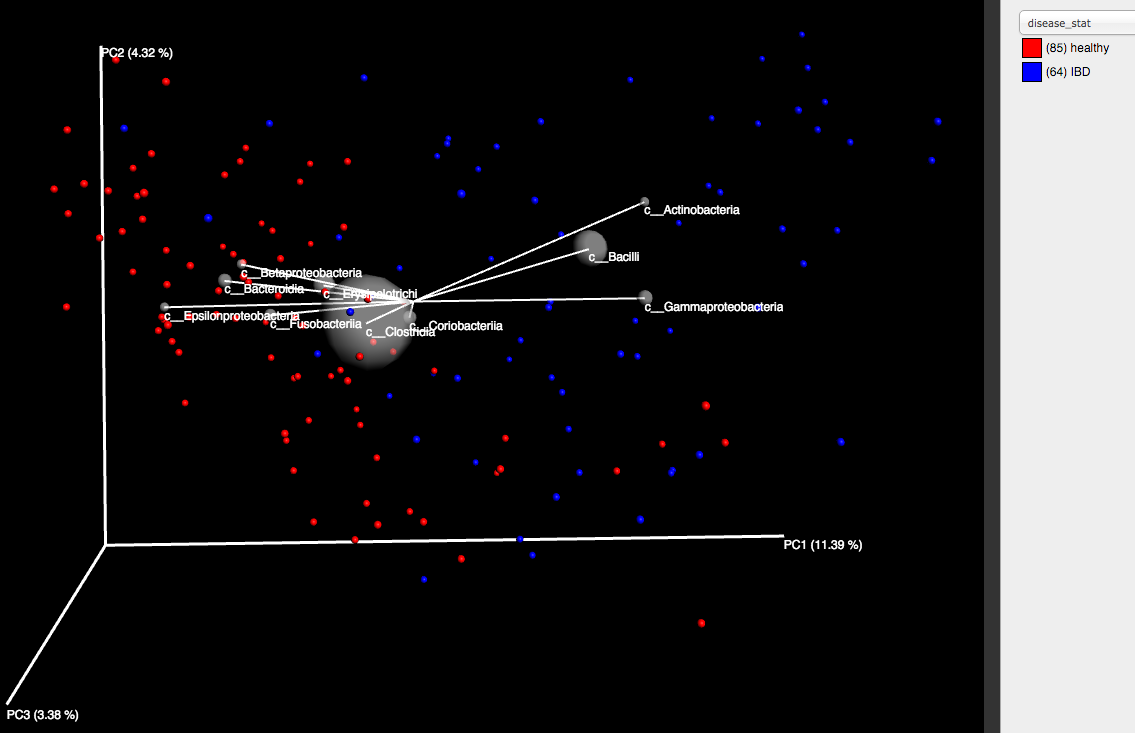

In [9]:
Image('beta/15000/screen-shots/unweighted-unifrac-biplot-disease-status.png')

### Weighted UniFrac

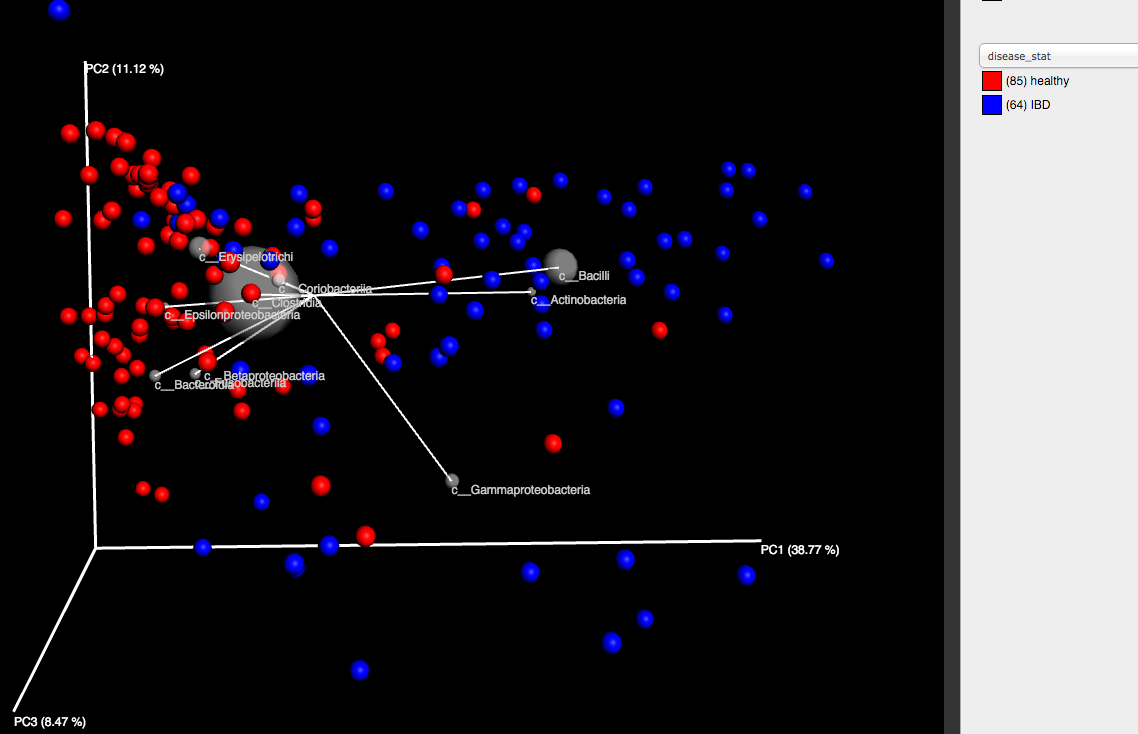

In [10]:
Image('beta/15000/screen-shots/weighted-unifrac-biplot-disease-status.png')

In [6]:
!compare_categories.py \
--method permanova \
-i beta/15000/unweighted_unifrac_dm.txt \
-m mapping-file-full.alpha.txt \
-c disease_stat \
-o beta/15000/stats-unweighted/

!compare_categories.py \
--method permanova \
-i beta/15000/weighted_unifrac_dm.txt \
-m mapping-file-full.alpha.txt \
-c disease_stat \
-o beta/15000/stats-weighted/

In [8]:
pd.read_csv('beta/15000/stats-unweighted/permanova_results.txt', sep='\t')

,method name,PERMANOVA
0,test statistic name,pseudo-F
1,sample size,149
2,number of groups,2
3,test statistic,9.4621807078652775
4,p-value,0.001
5,number of permutations,999


In [9]:
pd.read_csv('beta/15000/stats-weighted/permanova_results.txt', sep='\t')

,method name,PERMANOVA
0,test statistic name,pseudo-F
1,sample size,149
2,number of groups,2
3,test statistic,39.650724455899784
4,p-value,0.001
5,number of permutations,999
